import pandas as pd
stats = pd.read_csv('player_stats_data_test.csv')
print(stats.info())

In [1]:
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
from datetime import datetime
from time import time
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import re
import pickle
from itertools import islice, chain, repeat

## Eliteprospects scraping data

#### meta_stats_0

In [2]:
meta = pd.read_csv('Cohorts/elite_prospects_meta_stats_0.csv')
meta['date_of_birth'] = pd.to_datetime(meta['date_of_birth'])

In [3]:
meta.head()

,ep_id,full_name,date_of_birth,hometown,country,youth_team,position,height,weight,shoots
0,11101,Radek Meidl,1988-11-25,Prostejov,Czech,HC Olomouc,LW,191,3,L
1,40288,Nathan Snowie,1988-01-07,Charlottetown,Canada,-,C,183,86,L
2,106101,Shawn Boudreau,1994-03-17,Kentville,Canada,-,LW,188,76,L
3,155239,Mitch Jones,1995-02-08,Rochester,USA,-,D,180,90,L
4,268659,Matt Brassard,1998-08-08,Barrie,Canada,-,D,188,89,R


In [4]:
meta.describe()

,ep_id,height,weight
count,120.000000,120.000000,120.000000
mean,127609.541667,185.250000,80.841667
std,119200.046765,6.438135,22.369320
min,3693.000000,169.000000,2.000000
25%,33627.000000,180.000000,80.750000
50%,82346.000000,185.000000,86.000000
75%,204299.000000,190.000000,92.000000
max,472663.000000,201.000000,98.000000


In [12]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
ep_id            120 non-null int64
full_name        120 non-null object
date_of_birth    120 non-null datetime64[ns]
hometown         118 non-null object
country          120 non-null object
youth_team       120 non-null object
position         120 non-null object
height           120 non-null int64
weight           120 non-null int64
shoots           120 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 9.5+ KB


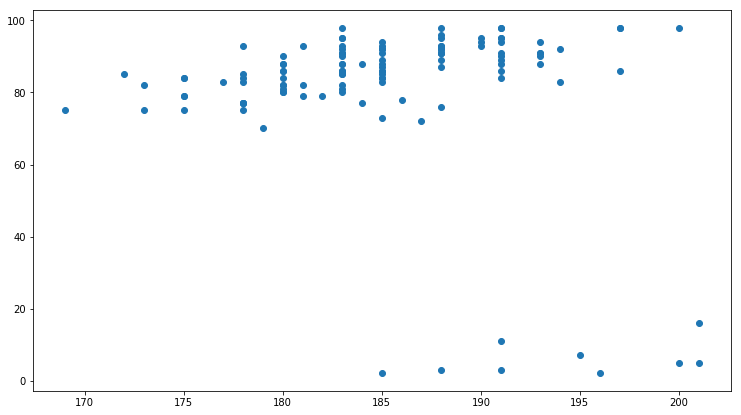

In [23]:

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(meta['height'], meta['weight'])

plt.show()

#### player_stats_0

In [ ]:
player = pd.read_csv('Cohorts/elite_prospects_player_stats_0.csv')

In [4]:
player.head()

,ep_id,season,team,league,games_played,goals,assists,penalty_min,plus_minus
0,11101,2006-07,Seattle Thunderbirds,WHL,72,16,11,89,3
1,11101,2007-08,Tri-City Americans,WHL,26,8,8,14,0
2,40288,2003-04,Cornwall Thunder Midget AAA,NBPEIMHL,0,0,0,0,0
3,40288,2004-05,Charlottetown Abbies,MJAHL,1,0,0,0,0
4,40288,2005-06,Prince Edward Island Rocket,QMJHL,61,6,4,26,-11


In [ ]:
stats = pd.read_csv('player_stats_data_test.csv')
stats.info()

In [ ]:
stats.tail()

In [ ]:
with open('listfile.data', 'rb') as filehandle:
    urls = pickle.load(filehandle)

def chunk_pad(it, size, padval=None):
    it = chain(iter(it), repeat(padval))
    return iter(lambda: tuple(islice(it, size)), (padval,) * size)

In [ ]:
player_url_list = list(chunk_pad(urls, 120))
cohort = player_url_list[1]
players_url = [str(i) for i in cohort]

In [ ]:
stats['EP_id'].nunique()

In [ ]:
stats.describe()

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = [8, 10])


ax1.hist(stats['plus_minus'], bins = 50, color = '#002147')

ax1.axvline(stats['plus_minus'].median(), color = '#a3c1ab', lw = 2.5)
ax1.axvline(stats['plus_minus'].mean(), color = '#600000', lw = 2.5)
ax1.set_title('Plus / Minus')


ax2.hist(stats['g'], bins = 35, color = '#002147')

ax2.axvline(stats['g'].median(), color = '#a3c1ab', lw = 2.5)
ax2.axvline(stats['g'].mean(), color = '#600000', lw = 2.5)
ax2.set_title('Goals')


ax3.hist(stats['a'], bins = 35, color = '#002147')

ax3.axvline(stats['a'].median(), color = '#a3c1ab', lw = 2.5)
ax3.axvline(stats['a'].mean(), color = '#600000', lw = 2.5)
ax3.set_title('Assists')


ax4.hist(stats['gp'], bins = 25, color = '#002147')

ax4.axvline(stats['gp'].median(), color = '#a3c1ab', lw = 2.5)
ax4.axvline(stats['gp'].mean(), color = '#600000', lw = 2.5)
ax4.set_title('Games Played')

ax1.minorticks_on()
ax1.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

ax2.minorticks_on()
ax2.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

ax3.minorticks_on()
ax3.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

ax4.minorticks_on()
ax4.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('player_stat_histograms.png')

plt.show()

In [ ]:
meta.head()

In [ ]:
player.head()

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(meta['height'], bins = 12, color = '#002147')
ax.set_title('Height')

ax.minorticks_on()
ax.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(meta['weight'], bins = 20, color = '#002147')
ax.set_title('Weight')

ax.minorticks_on()
ax.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.show()

In [ ]:
grouped = meta.groupby('position').agg({'height': 'median'}).reset_index()

grouped['position'] = grouped.replace({
    'W/C/D': 'D',
    'W/C': 'Forward',
    'RW/LW': 'Forward',
    'LW/RW': 'Forward',
    'LW/D': 'D',
    'LW/C/D': 'D',
    'LW/C': 'Forward',
    'F': 'Forward',
    'D/W': 'D',
    'C/RW': 'Forward',
    'C/LW': 'Forward'
})

fig, ax1 = plt.subplots(1, figsize = [12.5, 7])

ax1.bar(grouped['position'], grouped['height'], color = '#002147')

ax.set_ylim(bottom = 175, top = 200)

plt.show()